# Carbon Emissions Visualization Using GeoPandas and ArcGIS

### This notebook integrates annual CO2 emissions data from [Our World in Data](https://ourworldindata.org/co2-emissions) with geojson data sourced from [this GitHub repository](https://github.com/georgique/world-geojson). The purpose is to create a geojson file tailored for ArcGIS compatibility. This file facilitated the creation of an ArcGIS map that leverages the platform's timeline feature to dynamically visualize global CO2 emissions annually. View the interactive map [here](https://tjhsst.maps.arcgis.com/home/item.html?id=f9bfbab3880146649e6f449967cbf0a9).


## Preparation of CO2 data

1. **Data Loading**: Loads the CO2 emissions data from a CSV file located in the 'data' directory.
2. **Date Conversion**: Converts the 'Year' column to a datetime format, setting January 1st as the default date for each year to create a new 'Measurement Date' column.
3. **Data Filtering**: Filters the dataset to include records from the year 1890 onwards, focusing on more recent emissions data.
4. **Column Selection and Renaming**: Selects relevant columns ('Entity', 'Code', 'Measurement Date', and 'Annual CO₂ emissions') and renames them appropriately.
5. **Data Export**: Saves the processed data to a new CSV file in the 'data' directory for further use.

The final processed dataset is then displayed for review.

In [36]:
import pandas as pd
import os

data = pd.read_csv('data/annual-co2-emissions-per-country.csv')

data['Measurement Date'] = pd.to_datetime(data['Year'].astype(str) + '-01-01')

filtered_data = data[data['Year'] >= 1890]

final_data = filtered_data[['Entity', 'Code', 'Measurement Date', 'Annual CO₂ emissions']]

final_data.to_csv('data/processed-co2-emissions.csv', index=False)

final_data

,Entity,Code,Measurement Date,Annual CO₂ emissions
0,Afghanistan,AFG,1949-01-01,14656.0
1,Afghanistan,AFG,1950-01-01,84272.0
2,Afghanistan,AFG,1951-01-01,91600.0
3,Afghanistan,AFG,1952-01-01,91600.0
4,Afghanistan,AFG,1953-01-01,106256.0
...,...,...,...,...
30303,Zimbabwe,ZWE,2018-01-01,10714598.0
30304,Zimbabwe,ZWE,2019-01-01,9775428.0
30305,Zimbabwe,ZWE,2020-01-01,7849639.0
30306,Zimbabwe,ZWE,2021-01-01,8396158.0


## CO2 emissions data processing:

1. **Data Loading**: Loads the processed CO2 emissions data from a CSV file and ensures the 'Measurement Date' column is in datetime format.
2. **Geographical Data Processing**:
   - Initializes a dictionary to store the geometry of each country.
   - Loads a custom geojson file containing geographical data into a GeoDataFrame.
   - Iterates through the GeoDataFrame to extract and map each country's name to its geometric data.

3. **Data Normalization**:
   - Defines a dictionary to resolve naming discrepancies between the CO2 data and the geojson data, ensuring that country names in both datasets match.

4. **Name Correction**:
   - Updates the 'Entity' column in the CO2 dataset to reflect the corrected country names based on the discrepancies dictionary.
   - Maps each country's name in the CO2 dataset to its corresponding geometric data.

5. **Final Data Preparation**:
   - Filters the CO2 data to include only those entries that match the countries listed in the geojson data.
   - Saves the final dataset with geometric information to a CSV file for further analysis.

6. **Display Data**: Shows the final processed dataset, which now includes geometry information alongside CO2 emissions data, ready for geospatial analysis.


In [37]:
import geopandas as gpd
import pandas as pd
import os

co2_data = pd.read_csv('data/processed-co2-emissions.csv')
co2_data['Measurement Date'] = pd.to_datetime(co2_data['Measurement Date'])  # Ensure datetime format

countries_geometries = {}

gdf = gpd.read_file('data/custom.geo.json')

for index, row in gdf.iterrows():
    row_list = list(row)
    country_name = row_list[3]
    # print(country_name)
    geometry = row_list[-1]
    if not country_name in countries_geometries:
        countries_geometries[country_name] = geometry

discrepencies = {
    "United States": "United States of America",
    "Bahamas": "The Bahamas",
    "Ivory Coast": "Cote d'Ivoire",
    "East Timor": "Timor-Leste",
    "Russia": "Russian Federation",
    "Bolivia": "Bolivia (Plurinational State of)",
    "North Macedonia": "Macedonia (FYROM)",
    "Venezuela": "Venezuela (Bolivarian Republic of)",
    "Vietnam": "Viet Nam",
    "South Korea": "Republic of Korea",
    "North Korea": "Democratic People’s Republic of Korea",
    "Laos": "Lao People's Democratic Republic",
    "Moldova": "Republic of Moldova",
    "Tanzania": "United Republic of Tanzania",
    "Syria": "Syrian Arab Republic",
    "Taiwan": "Taiwan, Province of China",
    "Congo": "Democratic Republic of the Congo"
}

for country in discrepencies:
    map_country = discrepencies[country]
    if map_country in countries_geometries:
        co2_data.loc[co2_data["Entity"] == country, "Entity"] = map_country

co2_data["Geometry"] = co2_data["Entity"].map(countries_geometries)

countries_list = list(countries_geometries.keys())

co2_data = co2_data[co2_data["Entity"].isin(countries_list)]

co2_data.to_csv('data/test_polygons.csv', index=False)

co2_data

,Entity,Code,Measurement Date,Annual CO₂ emissions,Geometry
0,Afghanistan,AFG,1949-01-01,14656.0,"POLYGON ((66.51860680528867 37.36278432875879,..."
1,Afghanistan,AFG,1950-01-01,84272.0,"POLYGON ((66.51860680528867 37.36278432875879,..."
2,Afghanistan,AFG,1951-01-01,91600.0,"POLYGON ((66.51860680528867 37.36278432875879,..."
3,Afghanistan,AFG,1952-01-01,91600.0,"POLYGON ((66.51860680528867 37.36278432875879,..."
4,Afghanistan,AFG,1953-01-01,106256.0,"POLYGON ((66.51860680528867 37.36278432875879,..."
...,...,...,...,...,...
23931,Zimbabwe,ZWE,2018-01-01,10714598.0,"POLYGON ((31.19140913262129 -22.2515096981724,..."
23932,Zimbabwe,ZWE,2019-01-01,9775428.0,"POLYGON ((31.19140913262129 -22.2515096981724,..."
23933,Zimbabwe,ZWE,2020-01-01,7849639.0,"POLYGON ((31.19140913262129 -22.2515096981724,..."
23934,Zimbabwe,ZWE,2021-01-01,8396158.0,"POLYGON ((31.19140913262129 -22.2515096981724,..."


## Geospatial integration of the CO2 emissions data:

1. **GeoDataFrame Creation**: Converts the processed CO2 data, which includes geometry information, into a GeoDataFrame. This step is crucial for enabling spatial analysis and visualization.
2. **Data Export**:
   - Saves the GeoDataFrame as a geojson file using the 'GeoJSON' driver, facilitating its use in geospatial platforms like ArcGIS and QGIS.
   - Additionally, exports the GeoDataFrame to a CSV file, providing a non-spatial format for data review or further processing.

This results in a geospatial dataset ready for detailed analysis and mapping of global CO2 emissions.

In [38]:
geo_df = gpd.GeoDataFrame(co2_data, geometry='Geometry')
geo_df.to_file("data/co2_with_country_geo_final.geojson", driver='GeoJSON')
geo_df.to_csv('data/test_geo_polygons.csv', index=False)

## Verification of geospatial data

1. **Data Loading**: Loads geographic data from a custom geojson file into a GeoDataFrame.
2. **Geometry Extraction**:
   - Iterates through each row of the GeoDataFrame, extracting the geometry data and appending it to a list as dictionaries with the key 'Geometry'.

3. **GeoDataFrame Creation**:
   - Constructs a new GeoDataFrame using the list of geometry dictionaries, specifically designating the 'Geometry' column to handle spatial data.

4. **Data Visualization**:
   - Plots the geometries using the standard plotting functionality provided by GeoPandas to visually verify the spatial data integrity.

5. **Data Export**:
   - Saves the new GeoDataFrame as a geojson file using the 'GeoJSON' driver, making it suitable for further geospatial analysis and compatibility with geospatial software.

This process facilitates the visualization of geographic data and prepares it for further geospatial applications.

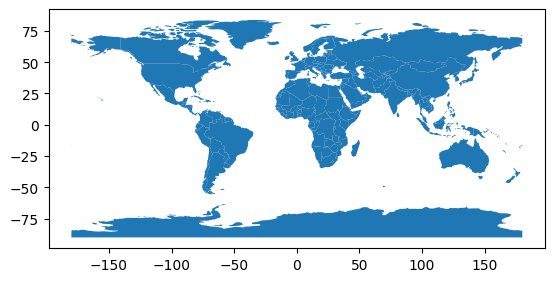

In [40]:
new_gdf = gpd.read_file('data/custom.geo.json')

geo_list = []

for index, row in new_gdf.iterrows():
    row_list = list(row)
    geo_list.append({"Geometry":row_list[-1]})

test_gdf = gpd.GeoDataFrame(geo_list, geometry="Geometry")

test_gdf.plot()
plt.show()

test_gdf.to_file("data/test.geojson", driver='GeoJSON')